Objective
===
使用 CSV(TaipeiWeatherJan.csv) 檔案繪製氣象圖表
1. 了解 CSV 檔案內容
2. 了解標題資料
3. 列出標題資料，並排序 enumerate() 
4. 讀取最高溫(High Temperature)和最低溫(Low Temperature) + 繪製最高溫
5. 設置繪圖區大小```figure(dpi = n, figisize = (width, height))```
6. 日期格式(datetime時間序列)
6. 在天氣增加時間刻度
```date = datetime.strptime(row[0], '%Y/%m/%d')```
7. 日期位置的旋轉```fig.autofmt_xdate(rotation = xx) ```
8. 同時繪製最高溫與最低溫，並注意資 料讀取時的```缺值```，```try...except...```
9. 填滿最高溫和最低溫之間的區域 ```plt.fill_between(dates, high_temp, low_temp, color = 'y', alpha = 0.2)```
10. Python 和 Excel (將資料寫入Excel模組)
11. 讀取xls資料
12. 標記出 Temp & Days 的 label(旁邊一條小小的線)，顏色是紅色 
```plt.tick_params(axis = 'both', labelsize = 12, color = 'red')```

## Resources

0. [JSON.org documentation](https://www.json.org/json-en.html)

1. [Web Scraping by BeautifulSoup 開發網路爬蟲、解析網頁資料](https://blog.gtwang.org/programming/python-beautiful-soup-module-scrape-web-pages-tutorial/)

2. [DAY16 - Big data 網頁解析](https://ithelp.ithome.com.tw/articles/10186119)

3. [Reading and writing in Python - "with statement"](https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python)

4. [utf-8 info](https://www.fileformat.info/info/unicode/utf8.htm#:~:text=UTF%2D8%20is%20a%20compromise,blocks%20to%20represent%20a%20character.)

5. [try except in Python - Programiz.com](https://www.programiz.com/python-programming/exception-handling)

**地圖繪製**
6. [Why Python pygal code can't show the map up in others IDE (not jupyter notebook)](https://stackoverflow.com/questions/48004229/python-pygal-code-world-map)
* [Python pygal documentation](http://www.pygal.org/en/stable/documentation/types/maps/pygal_maps_world.html)

**SVG file display**
8. [SVG 資料顯示於 IPython](https://stackoverflow.com/questions/56514491/ipython-display-svg-cannot-render-a-svg-image-generated-by-svg-filter-line-off)

**路徑問題**

9. [VScoed 開啟檔案需要完整的路徑物](https://stackoverflow.com/questions/63508254/filenotfounderror-errno-2-no-such-file-or-directory-data-json-in-vs-code)

## Problem 

讀取最高溫(High Temperature)和最低溫(Low Temperature)，在讀取資料時我發現，


## 1. 了解 CSV 檔案內容

In [6]:
import pandas as pd 

data_set = pd.read_csv('TaipeiWeatherJan.csv')
data_set
# print(data_set.columns)

,Date,HighTemperature,MeanTemperature,LowTemperature
0,2017/1/1,26,23,20
1,2017/1/2,25,22,18
2,2017/1/3,22,20,19
3,2017/1/4,27,24,20
4,2017/1/5,25,22,19
5,2017/1/6,25,22,20
6,2017/1/7,26,23,20
7,2017/1/8,22,20,18
8,2017/1/9,18,17,16
9,2017/1/10,20,18,16


## 2. 了解標題資料

In [7]:
import csv 

fn = 'TaipeiWeatherJan.csv'
with open(fn) as csvFile:
    csvReader = csv.reader(csvFile)
    
    # 讀取文件下一行(第一行是標題)
    headerRow = next(csvReader)
    print(headerRow)
    
#     listReport = list(csvReader)

['Date', 'HighTemperature', 'MeanTemperature', 'LowTemperature']


## 3. 列出標題資料，並排序 enumerate() 

In [11]:
import csv

fn = 'TaipeiWeatherJan.csv'
with open(fn) as csvFile:
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader)
#     print(csvReader)
    
    for i, header in enumerate(headerRow):
        print(i, header)

0 Date
1 HighTemperature
2 MeanTemperature
3 LowTemperature


## 4. 讀取最高溫(High Temperature)和最低溫(Low Temperature) + 繪製最高溫

<class '_csv.reader'>
High temp:  [26, 25, 22, 27, 25, 25, 26, 22, 18, 20, 21, 22, 18, 15, 15, 16, 23, 23, 22, 18, 15, 17, 16, 17, 18, 19, 24, 26, 25, 27, 18]
low temp:  [20, 18, 19, 20, 19, 20, 20, 18, 16, 16, 18, 18, 14, 12, 13, 13, 16, 18, 18, 12, 12, 12, 13, 14, 13, 13, 13, 16, 17, 14, 14]


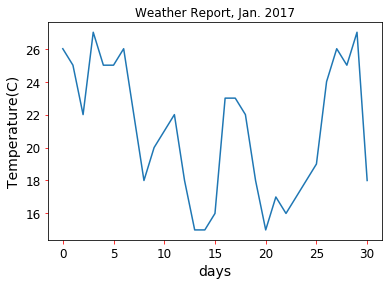

In [4]:
import csv 
import matplotlib.pyplot as plt

high_temp = []
low_temp = []
fn = 'TaipeiWeatherJan.csv'

with open(fn) as csvFile:
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader)
#     listReport = list(csvReader)
    print(type(csvReader))
    
    for row in csvReader:
        high_temp.append(int(row[1]))
        low_temp.append(int(row[3]))
        
print('High temp: ', high_temp)
print('low temp: ', low_temp)


# 繪製最高溫
plt.plot(high_temp)
plt.title('Weather Report, Jan. 2017')
plt.xlabel('days', fontsize = 14)
plt.ylabel('Temperature(C)', fontsize = 14)
# 標記出 Temp & Days 的 label  
plt.tick_params(axis = 'both', labelsize = 12, color = 'red')
plt.show()

## 5. 設置繪圖區大小
利用```figure()```設定繪圖區大小

繪圖區的寬 = n*width, 繪圖區的高 = n* height
```python
figure(dpi = n, figisize = (width, height))
```

<class '_csv.reader'>


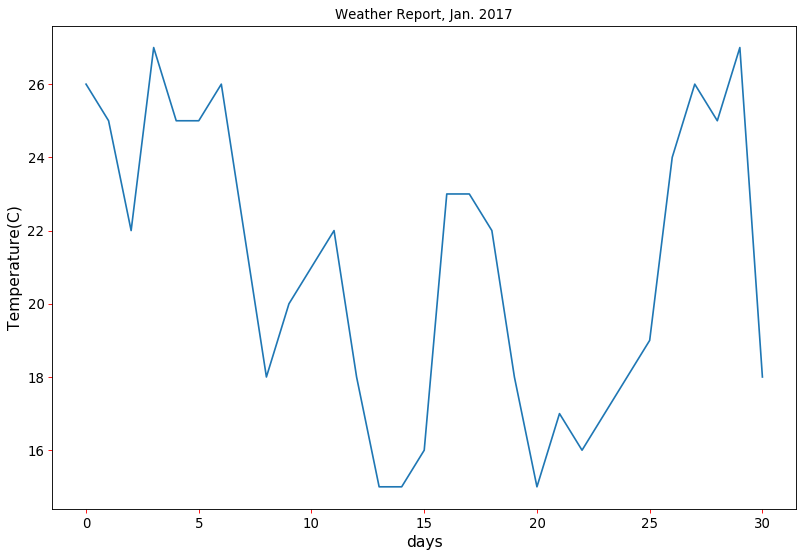

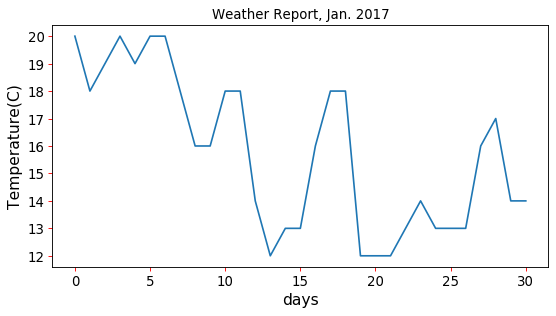

In [13]:
import csv 
import matplotlib.pyplot as plt

high_temp = []
low_temp = []
fn = 'TaipeiWeatherJan.csv'

with open(fn) as csvFile:
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader)
#     listReport = list(csvReader)
    print(type(csvReader))
    
    for row in csvReader:
        high_temp.append(int(row[1]))
        low_temp.append(int(row[3]))
        
# 繪製最高溫
# 設置繪圖區大小: figure 1
plot1 = plt.figure(1, dpi = 80, figsize = (12, 8))
plt.plot(high_temp)
plt.title('Weather Report, Jan. 2017')
plt.xlabel('days', fontsize = 14)
plt.ylabel('Temperature(C)', fontsize = 14)
# 標記出 Temp & Days 的 label  
plt.tick_params(axis = 'both', labelsize = 12, color = 'red')
plt.show()

# 繪製最低溫
# 設置繪圖區大小: figure 2
plot2 = plt.figure(2, dpi = 80, figsize = (8, 4))
plt.plot(low_temp)
plt.title('Weather Report, Jan. 2017')
plt.xlabel('days', fontsize = 14)
plt.ylabel('Temperature(C)', fontsize = 14)
plt.tick_params(axis = 'both', labelsize = 12, color = 'red')
plt.show()

## 6. 日期格式(datetime時間序列)
1. This is built-in library in python <br>
```from datetime import datetime```<br>

And then users can use ```strptime(string, format)```to analyze the string type of datetime object and tranfer it into datetime object.

2. 了解 解析過和沒解析過 data type 的不同，一個是 String, 另一個是 datetime.datetime 

3. 認識不同的時間表示方式，該如何處理
```date_type = '2017/1/1'```
```date_string = '21 June, 2018'```


In [19]:
# ch2_17.py
from datetime import datetime 

date_type = '2017/1/1'
print(type(date_type))

dateObj = datetime.strptime('2017/1/1', '%Y/%m/%d')
# dateObj = datetime.strptime('2017/1/1')
print(type(dateObj))
print(dateObj)

<class 'str'>
<class 'datetime.datetime'>
2017-01-01 00:00:00


In [23]:
from datetime import datetime 

date_string = '21 June, 2018'
print(type(date_string))

# 認識不同的時間表示方式
dateObj = datetime.strptime(date_string, '%d %B, %Y')
print(dateObj)

<class 'str'>
2018-06-21 00:00:00


## 6. 在天氣增加時間刻度
```date = datetime.strptime(row[0], '%Y/%m/%d')
```
1. 先讀取csv資料
2. 打開資料
3. 存取資料到high_temp/low_temp
4. 用時間分析row[0]
5. 畫圖(y-氣溫，x-日期)

         Date  HighTemperature  MeanTemperature  LowTemperature
0    2017/1/1               26               23              20
1    2017/1/2               25               22              18
2    2017/1/3               22               20              19
3    2017/1/4               27               24              20
4    2017/1/5               25               22              19
5    2017/1/6               25               22              20
6    2017/1/7               26               23              20
7    2017/1/8               22               20              18
8    2017/1/9               18               17              16
9   2017/1/10               20               18              16
10  2017/1/11               21               20              18
11  2017/1/12               22               20              18
12  2017/1/13               18               16              14
13  2017/1/14               15               14              12
14  2017/1/15               15          

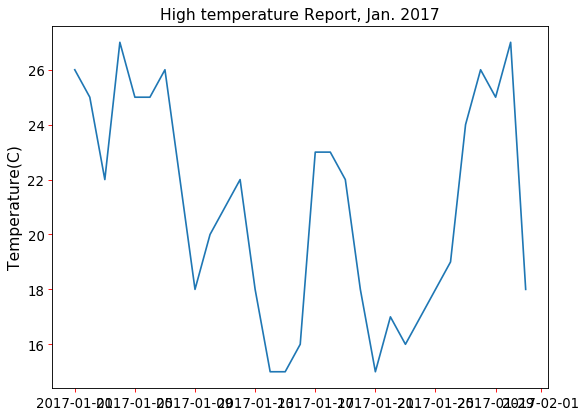

In [2]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

high_temp = []
low_temp = []
dates = []

fn = 'TaipeiWeatherJan.csv'
data = pd.read_csv(fn) 
print(data)

with open(fn) as csvFile:
    print(csvFile)
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader)
    for row in csvReader:
        high_temp.append(int(row[1]))
        low_temp.append(int(row[3]))
#         print(row[0])
        date = datetime.strptime(row[0], '%Y/%m/%d')
#         print(date)
        dates.append(date)
    
# 繪製溫度天氣圖表
plt.figure(1, dpi = 80, figsize = (8, 6))
plt.plot(dates, high_temp)
plt.title('High temperature Report, Jan. 2017', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('Temperature(C)', fontsize = 14)
plt.tick_params(axis='both', labelsize=12, color='red')
plt.show()

# plt.figure(2, dpi = 80, figsize = (12, 8))
# plt.plot(dates, low_temp)
# plt.title('Low temperature Report, Jan. 2017', fontsize = 14)
# plt.xlabel('', fontsize = 12)
# plt.ylabel('Temperature(C)', fontsize = 14)
# plt.tick_params(axis='both', labelsize=12, color='red')
# plt.show()

## 7. 日期位置的旋轉
日期是水平放置
```python
# xxx 是相關設定資訊
autofmt_xdate(xxx)
...
# rotation 若省略則系統使用最佳化預設 
fig.autofmt_xdate(rotation = xx) 
```

         Date  HighTemperature  MeanTemperature  LowTemperature
0    2017/1/1               26               23              20
1    2017/1/2               25               22              18
2    2017/1/3               22               20              19
3    2017/1/4               27               24              20
4    2017/1/5               25               22              19
5    2017/1/6               25               22              20
6    2017/1/7               26               23              20
7    2017/1/8               22               20              18
8    2017/1/9               18               17              16
9   2017/1/10               20               18              16
10  2017/1/11               21               20              18
11  2017/1/12               22               20              18
12  2017/1/13               18               16              14
13  2017/1/14               15               14              12
14  2017/1/15               15          

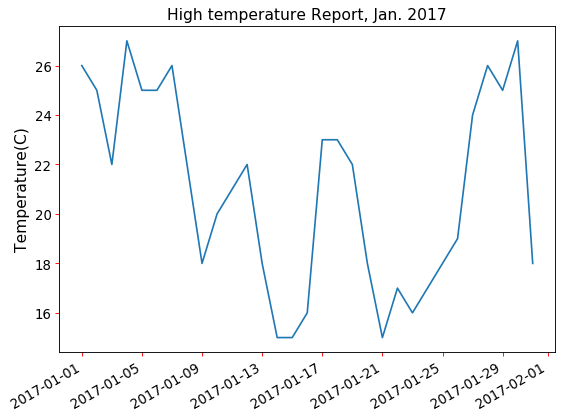

In [5]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

high_temp = []
low_temp = []
dates = []

fn = 'TaipeiWeatherJan.csv'
data = pd.read_csv(fn) 
print(data)

with open(fn) as csvFile:
#     print(csvFile)
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader)
    for row in csvReader:
        high_temp.append(int(row[1]))
        low_temp.append(int(row[3]))
        date = datetime.strptime(row[0], '%Y/%m/%d')
        dates.append(date)
    
# 繪製溫度天氣圖表
fig = plt.figure(dpi = 80, figsize = (8, 6))
plt.plot(dates, high_temp)
fig.autofmt_xdate()
plt.title('High temperature Report, Jan. 2017', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('Temperature(C)', fontsize = 14)
plt.tick_params(axis='both', labelsize=12, color='red')
plt.show()

## 8. 繪製最高溫與最低溫
同時繪製最高與最低溫圖表，這是來處理異常過程，在讀取真實的網路數據資料過程中，常常會有不可預期的資料發生消失。為了避免程式因數據不良而發生Break，所以設定以下程式碼。

```python
except Exception:
    print('有缺值')
```

         Date  HighTemperature  MeanTemperature  LowTemperature
0    2017/1/1               26               23              20
1    2017/1/2               25               22              18
2    2017/1/3               22               20              19
3    2017/1/4               27               24              20
4    2017/1/5               25               22              19
5    2017/1/6               25               22              20
6    2017/1/7               26               23              20
7    2017/1/8               22               20              18
8    2017/1/9               18               17              16
9   2017/1/10               20               18              16
10  2017/1/11               21               20              18
11  2017/1/12               22               20              18
12  2017/1/13               18               16              14
13  2017/1/14               15               14              12
14  2017/1/15               15          

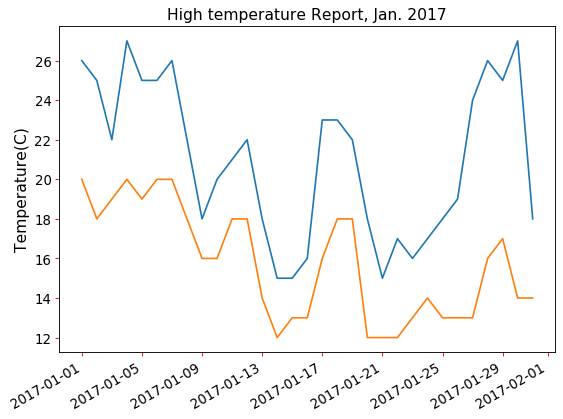

In [10]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

high_temp, low_temp, dates = [], [], []

fn = 'TaipeiWeatherJan.csv'
# data = pd.read_csv(fn) 
# print(data)

with open(fn) as csvFile:
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader)
    for row in csvReader:
        try:
            highTemp = int(row[1])
            lowTemp = int(row[3])
            date = datetime.strptime(row[0], '%Y/%m/%d')
        except Exception:
            print('有缺值')
        else:
            high_temp.append(highTemp)
            low_temp.append(lowTemp)
            dates.append(date)

# 繪製溫度天氣圖表
fig = plt.figure(dpi = 80, figsize = (8, 6))
# 繪製最高溫
plt.plot(dates, high_temp)
# 繪製最低溫
plt.plot(dates, low_temp)
plt.title('High temperature Report, Jan. 2017', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('Temperature(C)', fontsize = 14)
plt.tick_params(axis='both', labelsize=12, color='red')
# 旋轉 x 軸角度
fig.autofmt_xdate(rotation = 30)
plt.show()

## 9. 填滿最高溫和最低溫之間的區域 ```plt.fill_between(dates, high_temp, low_temp, color = 'y', alpha = 0.2)```



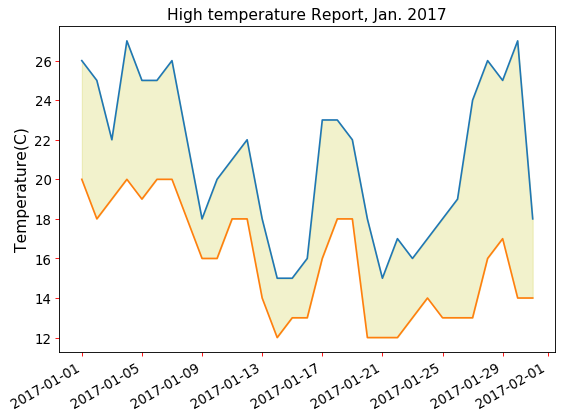

In [12]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

high_temp, low_temp, dates = [], [], []

fn = 'TaipeiWeatherJan.csv'
# data = pd.read_csv(fn) 
# print(data)

with open(fn) as csvFile:
    csvReader = csv.reader(csvFile)
    headerRow = next(csvReader)
    for row in csvReader:
        try:
            highTemp = int(row[1])
            lowTemp = int(row[3])
            date = datetime.strptime(row[0], '%Y/%m/%d')
        except Exception:
            print('有缺值')
        else:
            high_temp.append(highTemp)
            low_temp.append(lowTemp)
            dates.append(date)

# 繪製溫度天氣圖表
fig = plt.figure(dpi = 80, figsize = (8, 6))
# 繪製最高溫
plt.plot(dates, high_temp)
# 繪製最低溫
plt.plot(dates, low_temp)
plt.title('High temperature Report, Jan. 2017', fontsize = 14)
plt.xlabel('', fontsize = 12)
plt.ylabel('Temperature(C)', fontsize = 14)
plt.tick_params(axis='both', labelsize=12, color='red')
# 旋轉 x 軸角度
fig.autofmt_xdate(rotation = 30)
plt.fill_between(dates, high_temp, low_temp, color = 'y', alpha = 0.2)
plt.show()

## 10. Python 和 Excel (將資料寫入Excel模組)
1. 建立活頁簿
2. 建立工作表
3. 將資料寫入儲存格
4. 儲存活頁簿

In [16]:
import xlwt
from xlwt import *

fn = 'out2_25.xls'
datahead = ['Phone', 'TV', 'NoteBook']
price = ['35000', '18000', '28000']
wb = Workbook(encoding = 'utf-8')
sh = wb.add_sheet('sheet1', cell_overwrite_ok = True)
for i in range(len(datahead)):
    sh.write(0, i, datahead[i])
for j in range(len(price)):
    sh.write(1, j, price[j])

wb.save(fn)

In [7]:
# ch2_25.py
import xlwt

fn = 'out2_25.xls'
datahead = ['Phone', 'TV', 'Notebook']
price = ['35000', '18000', '28000']
wb = xlwt.Workbook(encoding = 'utf-8')
sh = wb.add_sheet('sheet1', cell_overwrite_ok = True)

for i in range(len(datahead)):
    sh.write(0, i, datahead[i])     # 寫入datahead list
for j in range(len(price)):
    sh.write(1, j, price[j])        # 寫入price lis
    
wb.save(fn)

## 11. 開啟xls資料

In [11]:
import xlrd

fn = 'out2_25.xls'
wb = xlrd.open_workbook(fn)
sh = wb.sheets()[0]
rows = sh.nrows

for row in range(rows):
    print(sh.row_values(row))

['Phone', 'TV', 'Notebook']
['35000', '18000', '28000']
